## Central Limit Theorem

The central limit theorem states that the mean of a sufficiently large number of
identically distributed random variates will be approximately normally distributed. 
Or in other words, the sampling distribution of the mean tends toward normality,
regardless of the distribution.

* Lets say that we will have a presidential election between two candidates, Alice and Bob, and that we want to try to predict who will be the winner. Suppose that there is a method which returns 1 if a person will vote on Alice and 0 otherwise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

#from matplotlib.mlab import frange

In [2]:
def random_opinion():    
    probability_of_alice_win = 0.53 # Usually this probabiliy is not known
    return np.random.binomial(n = 1,p = probability_of_alice_win) # n=1 trails

random_opinion()

0

In [3]:
def sample_from_distribution(n):
    sample_opinions = []
    for i in range(n):
        sample_opinions.append(random_opinion())
    
    return sample_opinions

example = sample_from_distribution(10)
print(example)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]


Then suppose that, in an interval of 5 days, we interviewed 100 people per day regarding which would be their candidate for the election. This way, we would have 5 different samples of the same distribution, each one with size 100

In [4]:
def get_n_samples_from_distribution(samples_number, sample_size): # Get multiple samples from our target 'unknown distribution'.  
    people_per_day = [sample_size] * samples_number
    week_samples = list(map(sample_from_distribution, people_per_day))#returns a list of the results after applying the given function to each item of a given iterable 
    return week_samples                                               #returns a mutable sequence list of elements 

def get_n_sample_means_from_distribution(samples_number, sample_size):
    samples = get_n_samples_from_distribution(samples_number = samples_number,sample_size = sample_size)
    return list(map(np.mean, samples))

sample_means = get_n_sample_means_from_distribution(5, 100)
print(sample_means)

[0.49, 0.56, 0.57, 0.56, 0.58]


Now imagine that we have infinite money and time, so we could do the same for 5, 50, 500, 1000, 10000 and 100000 days.

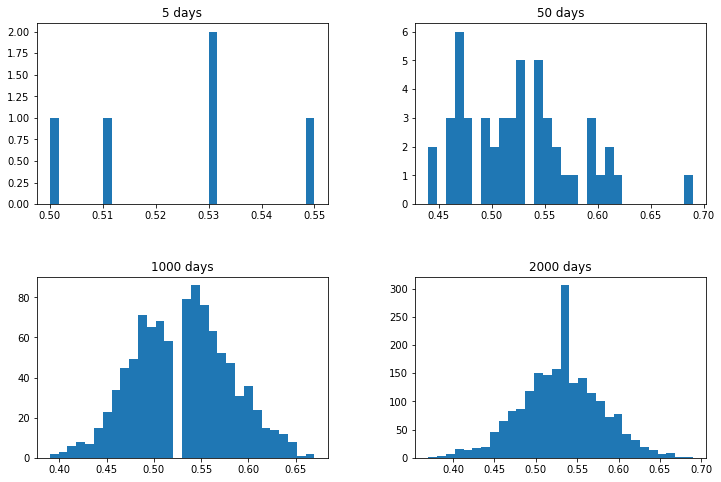

In [7]:
fig, axes = plt.subplots(2,2, figsize = (12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.ravel()

days = [5, 50, 100, 1000]
for i in range(len(days)):
    sample_means = get_n_sample_means_from_distribution(samples_number = days[i],sample_size = 100)    
    axes[i].hist(sample_means, bins=30)
    axes[i].set_title("{0} days".format(days[i]))

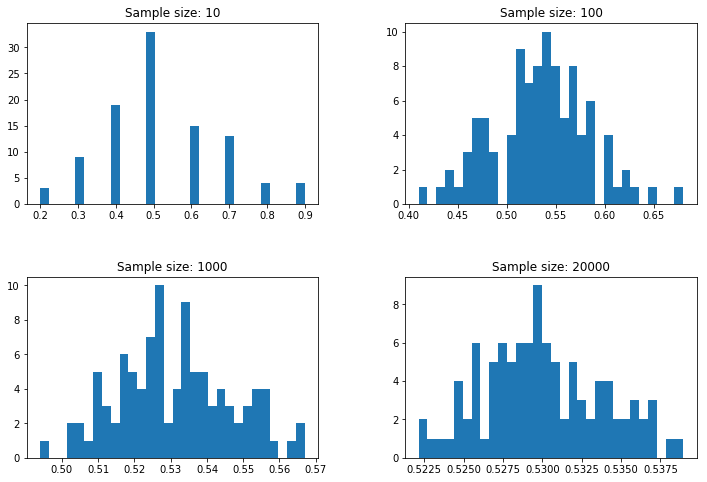

In [11]:
fig, axes = plt.subplots(2,2, figsize = (12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.ravel()

sample_size = [10, 100, 1000, 20000]
for i in range(len(sample_size)):
    sample_means = get_n_sample_means_from_distribution(samples_number = 100,sample_size = sample_size[i])    
    axes[i].hist(sample_means, bins=30)
    axes[i].set_title("Sample size: {0}".format(sample_size[i]))

* Chi2 distributions

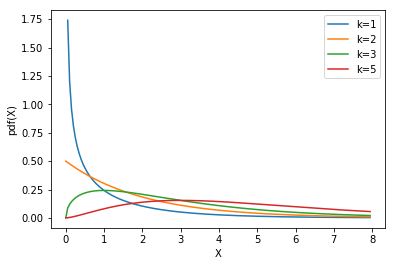

In [2]:
t=np.arange(0, 8, 0.05)
Chi2Vals = [1,2,3,5]
    
for chi2 in Chi2Vals:
    plt.plot(t, stats.chi2.pdf(t, chi2), label='k={0}'.format(chi2))
    plt.legend()
        
plt.xlim(0,8)
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.axis('tight')
plt.show()    

* exponential distributions

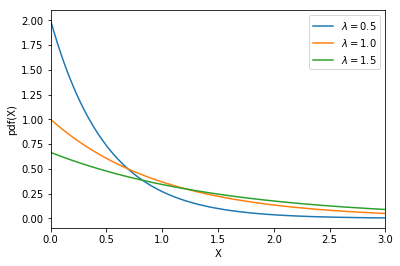

In [3]:
t=np.arange(0, 3, 0.01)
lambdas = [0.5, 1, 1.5]
    
for par in lambdas:
    plt.plot(t, stats.expon.pdf(t, 0, par), label='$\lambda={0:3.1f}$'.format(par))
    plt.legend()

plt.legend()    
plt.xlim(0,3)
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.show()